# Tarea 6: Reducción de Dimensiones: caso de insuficiencia cardiaca 

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la tarea 6, en la que se usará la reducción de dimensiones para visualizar la estructura de datos en espacios de muchas dimensiones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder

## Cargar datos de insuficiencia cardiaca

Los datos quedarán almacenados en X y las etiquetas en y

Los datos originales tienen varias columnas categóricas, que requieren ser 
codificadas one-hot para que tenga sentido.

Cargamos entonces primero los datos crudos, convirtiendo esas columnas a números,
y posteriormente 

In [2]:
archivo_csv = 'heart.csv' 

## Es necesario manejar manualmente la conversión de varias columnas categóricas
converters={}
for i in range(12):
    converters[i] = lambda x : float(x)
    
converters[1] =  lambda x : 1.0 if (x==b'F') else 0.0

# TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
pain_types={b'TA':0.0,b'ATA':1.0,b'NAP':2.0,b'ASY':3.0}
converters[2] = lambda x : pain_types[x]

# RestingECG: resting electrocardiogram results 
#  Normal: Normal, 
#  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
restingECG_types={b'Normal':0.0,b'ST':1.0,b'LVH':2.0}
converters[6] = lambda x : restingECG_types[x]

converters[8] =  lambda x : 1.0 if (x==b'Y') else 0.0

stslope_type = {b'Up':1.0,b'Flat':0.0,b'Down':-1.0}
converters[10] = lambda x : stslope_type[x]

# Carguemos los datos
data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)

# Necesitamos recodificar dos columnas y luego armar la matriz de datos a pedazos
enc = OneHotEncoder()
cp=enc.fit_transform(data[:,2].reshape(-1,1)).toarray() # chest pain 
re=enc.fit_transform(data[:,6].reshape(-1,1)).toarray() # resting ECG

print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 918 x 12


In [3]:
# La última columna tiene las etiquetas
y=data[:,11].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=np.column_stack((data[:,0:2],cp,data[:,3:6],re,data[:,7:11]))
print("Data shape :",X.shape)

Label shape: (918,)
Data shape : (918, 16)


### Normalización de los datos

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("X normalized",X_normalized)

X normalized [[-1.4331398  -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359  1.93816322 -0.22967867 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972 -0.51595242 -0.22967867 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972  1.93816322 -0.22967867 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]]


In [6]:
from sklearn.decomposition import PCA

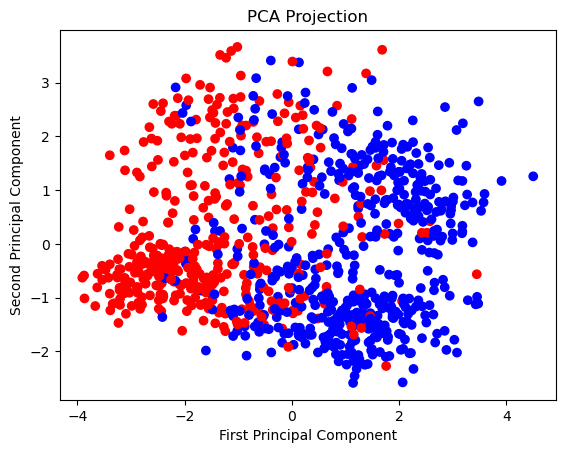

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')

plt.show()

### Métodos de reducción de dimensiones:

# KPCA

In [8]:
from sklearn.decomposition import KernelPCA

In [9]:
kpca = KernelPCA(n_components=2, kernel='poly', gamma=1/10)
X_kpca = kpca.fit_transform(X_normalized)
print(X_kpca)

[[-0.25270119 -2.36809481]
 [-0.14458337 -0.72053322]
 [-0.27678223 -1.16910489]
 ...
 [-0.45667438  0.69264377]
 [ 0.07889663 -1.45408629]
 [-0.19793646 -1.36607488]]


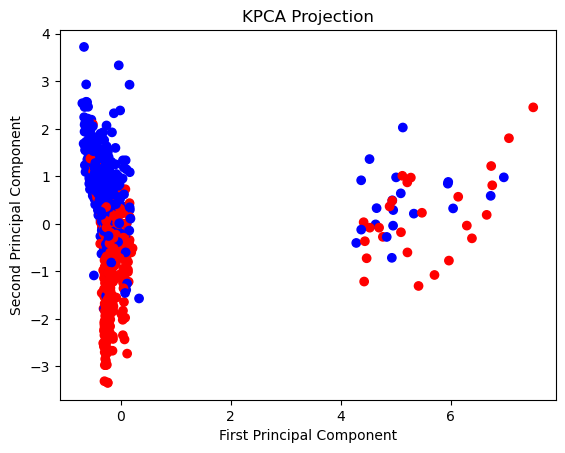

In [10]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KPCA Projection')

plt.show()

# ISOMAP

In [11]:
from sklearn.manifold import Isomap

In [12]:
isomap = Isomap(n_components=2, n_neighbors=800, metric='manhattan')

isomap.fit(X_normalized)

X_isomap = isomap.transform(X_normalized)

print(X_isomap)

[[-9.73760788 -2.49625036]
 [-5.68279533 -1.37967647]
 [-6.09080643  4.2530191 ]
 ...
 [ 5.13820262 -4.23409821]
 [-7.45950005  8.75688383]
 [-8.89802315 -2.16472891]]


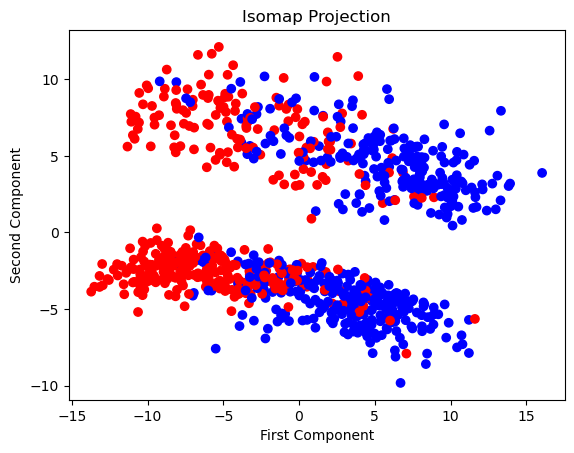

In [13]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Isomap Projection')

plt.show()

### Métodos de reducción de dimensiones (supervisado):

# PLS

In [14]:
from sklearn.cross_decomposition import PLSRegression

In [15]:
# Linear Discriminant Analysis (LDA)
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_normalized, y)[0]

# print the transformed data
print("LDA transformed data:")
print(X_pls)

LDA transformed data:
[[ 2.94437961 -0.85864588]
 [ 1.45553028  0.10806248]
 [ 1.8084946   1.38628186]
 ...
 [-1.774994   -0.71741483]
 [ 2.23881547  0.50133176]
 [ 2.42859547 -0.92884692]]


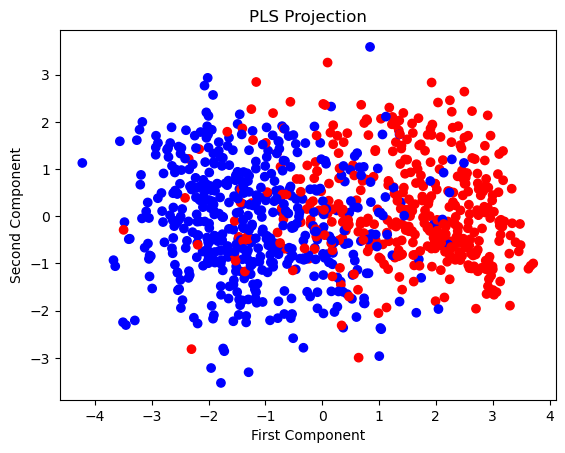

In [16]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PLS Projection')

plt.show()

# UMAP

In [17]:
import umap

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X_normalized, y)

# print the transformed data
print("UMAP transformed data:")
print(X_umap)

UMAP transformed data:
[[ 9.729163  24.816729 ]
 [ 5.3476357  8.169384 ]
 [ 5.62015   15.900147 ]
 ...
 [ 8.604185  -7.1233344]
 [15.708112   3.4205804]
 [ 4.8120327  5.7667522]]


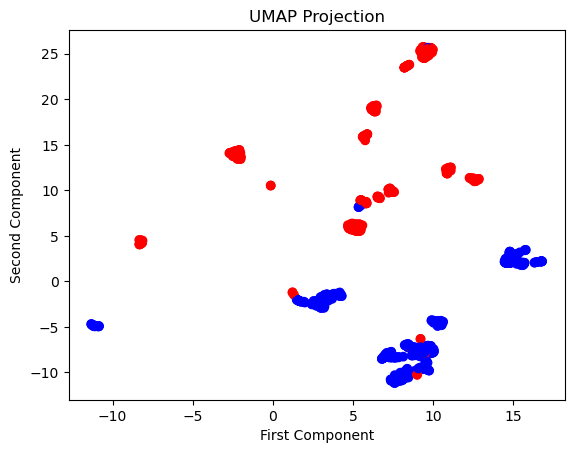

In [19]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('UMAP Projection')

plt.show()

# PaCMAP

In [20]:
import pacmap

In [21]:
# PaCMAP
reducer = pacmap.PaCMAP(n_components =2)
X_pacmap = reducer.fit_transform(X_normalized)

# print the transformed data
print("PaCMAP transformed data:")
print(X_pacmap)

PaCMAP transformed data:
[[-13.707462  -11.120404 ]
 [ -8.647607    8.888178 ]
 [-14.108459   -5.7108364]
 ...
 [  5.133609   -7.1816597]
 [-18.25076    -2.4379718]
 [-10.0404415   4.407255 ]]


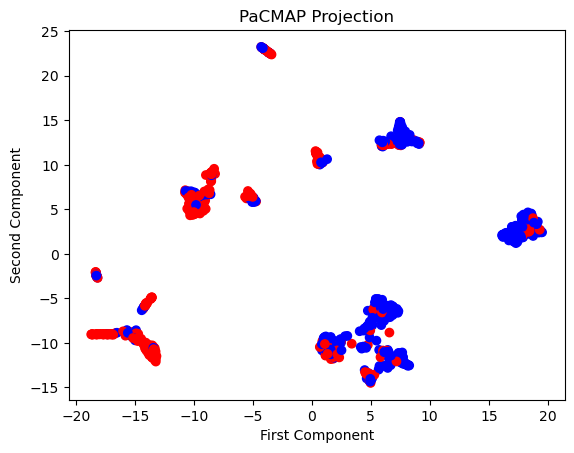

In [22]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PaCMAP Projection')

plt.show()

###  Aglomeración

# K-means

In [23]:
from sklearn.cluster import KMeans

In [24]:
def find_clusters(X, k, random_state=0):
    # create an instance of the KMeans class
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    
    # fit the data
    kmeans.fit(X)
    
    # get the cluster assignments
    clusters = kmeans.predict(X)
    
    return clusters

In [25]:
clusters = find_clusters(X_normalized, 11)

# print the cluster assignments
print("Cluster assignments:")
print(clusters)

Cluster assignments:
[ 2  4 10  3  4  4  2  2  3  2  4  0  2  3 10  2  1  2  1  2  6  2  2  3
  4  4  0  2  2  2  4  4  3  0  2  2  3 10 10  3  2 10  2 10  3  4  1  2
  4  1  3  3  2  2  3  2  1 10 10  0  2  4  1  3  2  2  1  2  0  1 10  2
  1 10  3  4  1  1  2  1  4  2  8  2  3  8  3  2  6  3  2  1  2  3 10  3
  2  4  1  2  0  1  3  3  1  2 10 10  1  2  2  3  5  2 10  1  1  0  6  6
  4  4 10  3  2  2  2  1  2  4  4  1  0  0  0  4 10 10  8  3  3  0  0  1
  2  1  2 10  2  3  2  2  2  1 10  3  1  1  3 10  9  8  2  2  2  6  0  2
  1  4  2  4  2  4  3  3  3  2  4  1  3  2  3  0  2  0  2  5  3  0 10 10
  2  4  2  6  1  2  3  6  6  4  4 10  2  1  7  2  7  1  5  4  4 10  3  6
  1  4  2  2  1  3  4  4  2  1  4  3  2 10  1  4  2  1 10  2  3  6  3  3
  2  3  3  2  3  6  4  0  0  3  1  3  0  2  3  4  7  4  4  2  2  2  3  8
  4  2  3  2  3  4  1  2  3  7  2  4  4  3  0 10  7  3  4 10  1  4  1  2
 10  2  4  2  1  8  6  5  5  0  5 10  5 10  5  0  5  5  5 10  5  5  8  5
  5  5  8 10  4  5  5  5  4  5

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


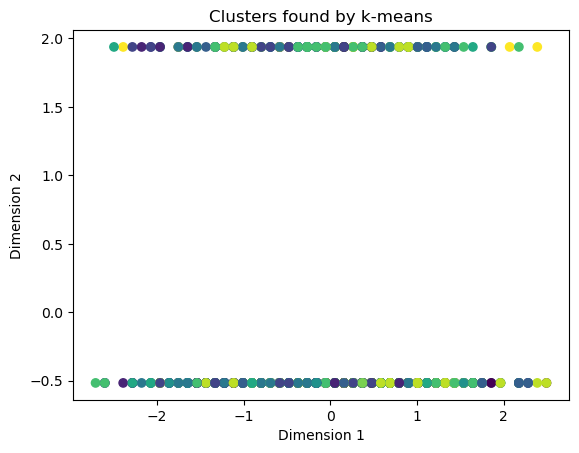

In [26]:
# create a scatter plot of the first two dimensions of the data
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters, cmap='viridis')

# add axis labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# add a title
plt.title('Clusters found by k-means')

# show the plot
plt.show()